In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('diabetes.csv')

In [26]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [20]:
# Set seed for reproducibility
np.random.seed(92)

# a) Random sample of 25 observations
sample = df.sample(25)

# Population statistics
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

# Sample statistics
sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()


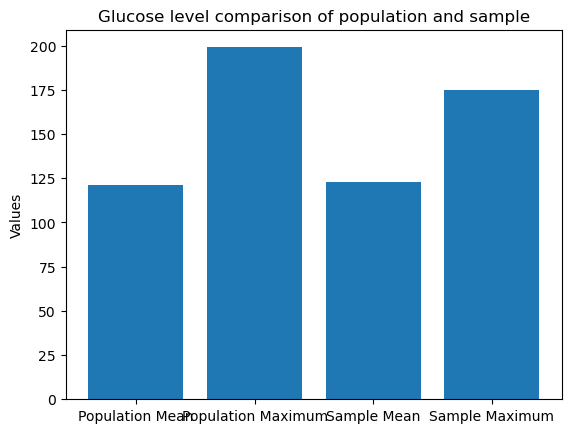

In [5]:
# Create a bar chart for comparison
fig, ax = plt.subplots()
labels = ['Population Mean', 'Population Maximum', 'Sample Mean', 'Sample Maximum']
values = [population_mean_glucose, population_max_glucose, sample_mean_glucose, sample_max_glucose]
ax.bar(labels, values)
ax.set_ylabel('Values')
plt.title('Glucose level comparison of population and sample')
plt.show()

In [6]:
# b) 98th percentile of BMI
population_percentile_bmi = np.percentile(df['BMI'], 98)
sample_percentile_bmi = np.percentile(sample['BMI'], 98)


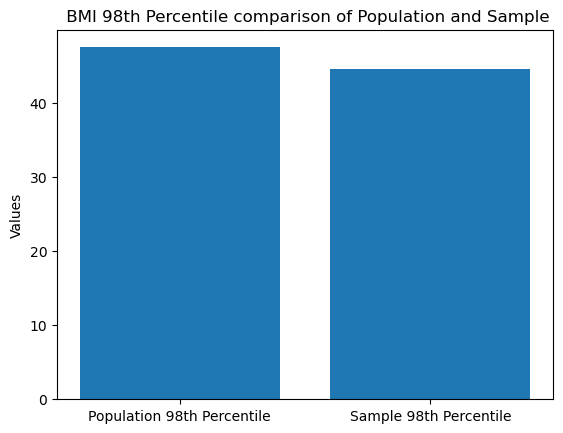

In [10]:
# Create a bar chart for comparison
fig, ax = plt.subplots()
labels = ['Population 98th Percentile', 'Sample 98th Percentile']
values = [population_percentile_bmi, sample_percentile_bmi]
ax.bar(labels, values)
ax.set_ylabel('Values')
plt.title(' BMI 98th Percentile comparison of Population and Sample')
plt.show()

In [11]:
# c) Bootstrap sampling
n_bootstrap_samples = 500
bootstrap_sample_size = 150
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []
bootstrap_percentiles1 = []

for _ in range(n_bootstrap_samples):
    bootstrap_sample = df.sample(bootstrap_sample_size, replace=True)
    bootstrap_means.append(bootstrap_sample['BloodPressure'].mean())
    bootstrap_stds.append(bootstrap_sample['BloodPressure'].std())
    bootstrap_percentiles.append(np.percentile(bootstrap_sample['BloodPressure'], 30))  
    bootstrap_percentiles1.append(np.percentile(bootstrap_sample['BloodPressure'], 70))

In [12]:

population_mean_bp = df['BloodPressure'].mean()
population_std_bp = df['BloodPressure'].std()
population_percentile_bp = np.percentile(df['BloodPressure'], 30)
population_percentile_bp = np.percentile(df['BloodPressure'], 70)

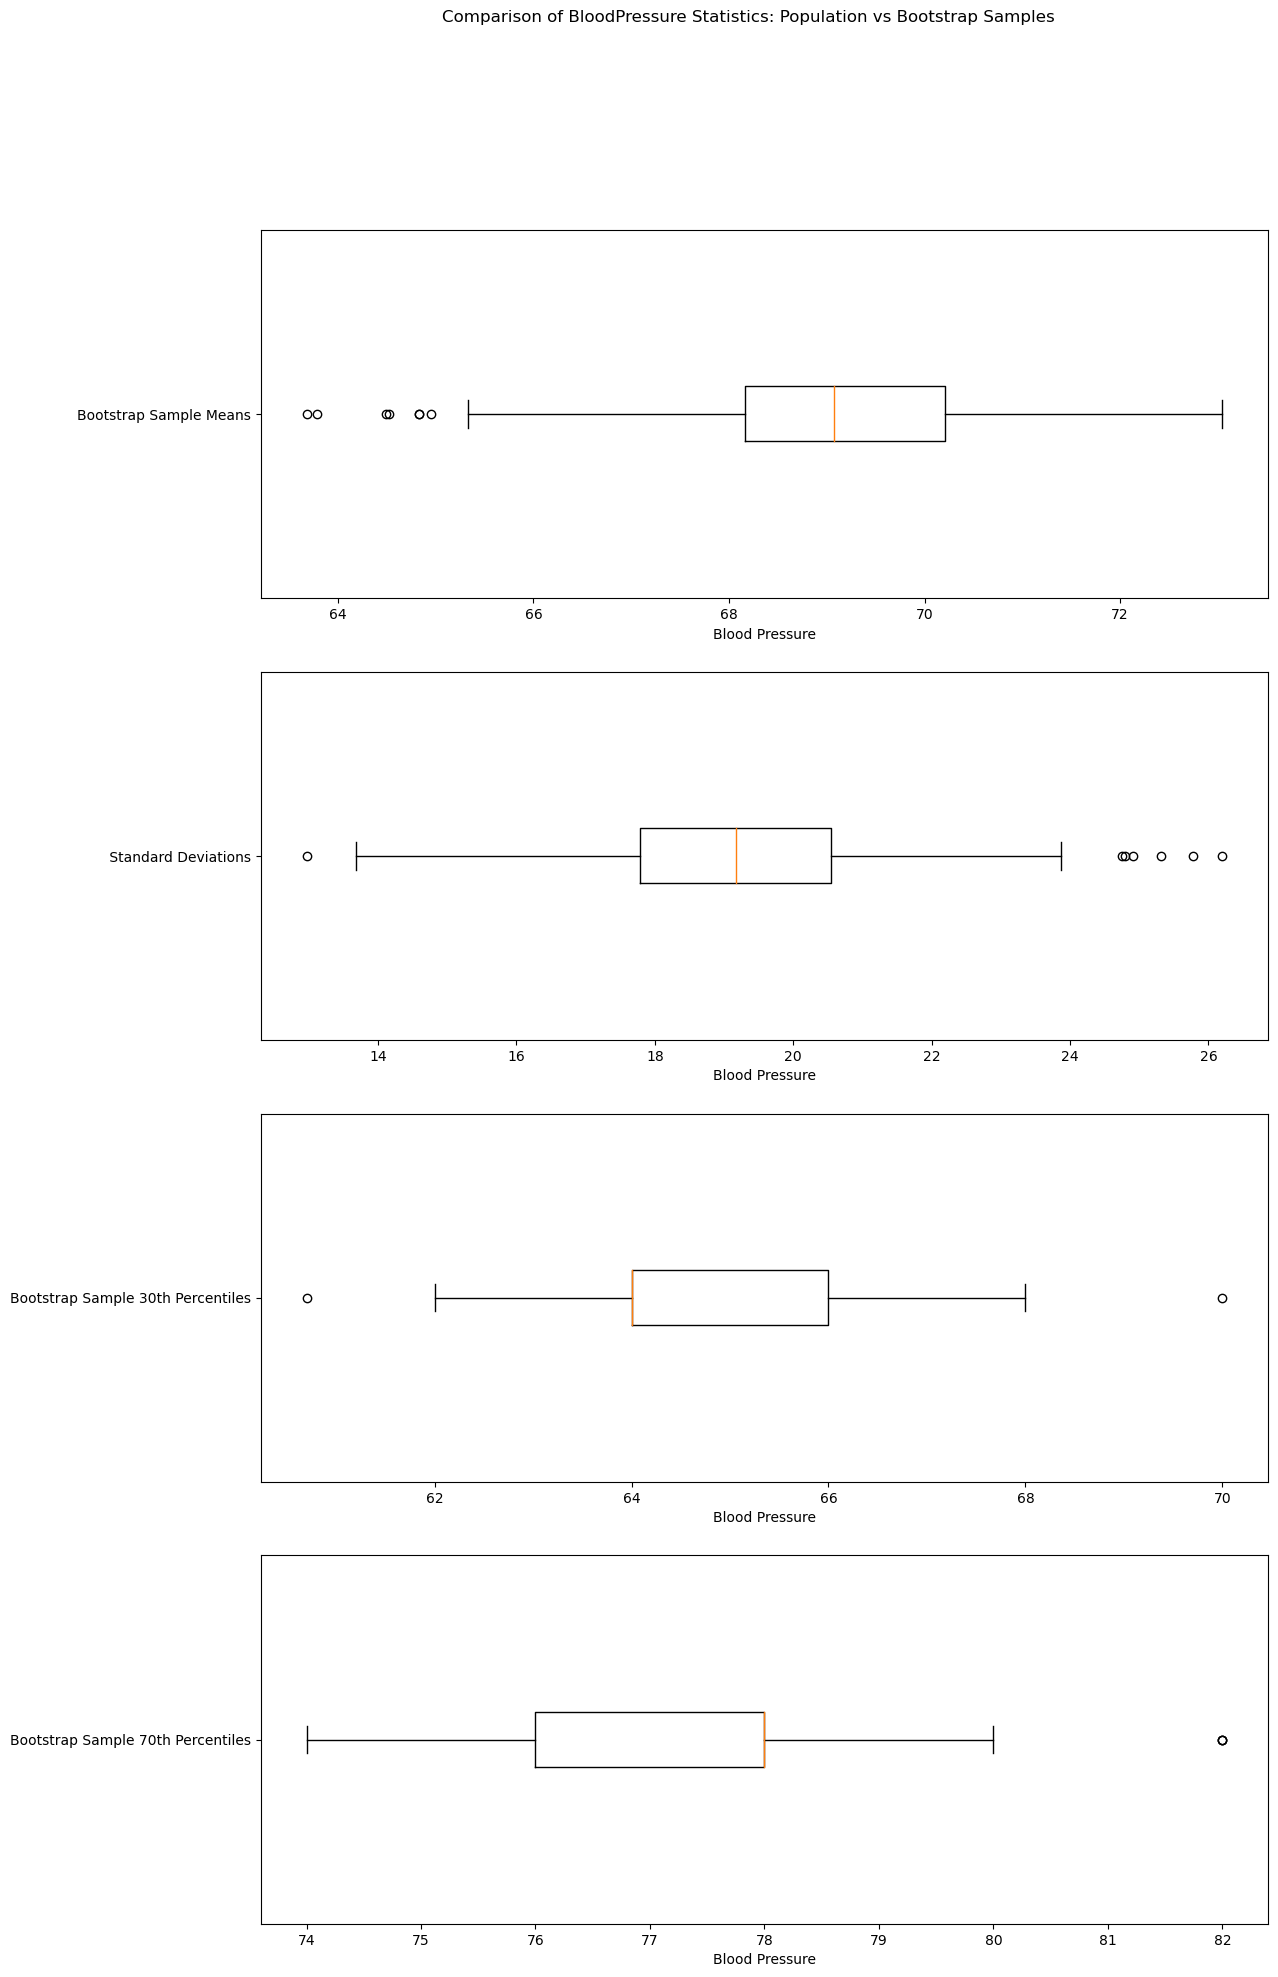

In [21]:

fig, axes = plt.subplots(4, 1, figsize=(13, 22))

axes[0].boxplot(bootstrap_means, vert=False, labels=['Bootstrap Sample Means'])
axes[0].set_xlabel('Blood Pressure')
axes[1].boxplot(bootstrap_stds, vert=False, labels=[' Bootstrap Sample Standard Deviations'])
axes[1].set_xlabel('Blood Pressure')
axes[2].boxplot(bootstrap_percentiles, vert=False, labels=['Bootstrap Sample 30th Percentiles'])
axes[2].set_xlabel('Blood Pressure')
axes[3].boxplot(bootstrap_percentiles1, vert=False, labels=['Bootstrap Sample 70th Percentiles'])
axes[3].set_xlabel('Blood Pressure')

plt.suptitle('Comparison of BloodPressure Statistics: Population vs Bootstrap Samples')
plt.show()